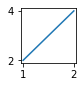

In [1]:
# For some reason this seems to be necessary in anaconda to stop matplotlib crashing
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(1,1))
plt.plot([1,2],[2,4])
plt.show()

In [2]:
# Now import everything else
import numpy as np
import pylab
import time
import scipy
from scipy.interpolate import interp2d

# Camera Object

In [3]:
# Make a camera object
#from CamFLIR import CamFLIR
from CamHamThread import CamHamThread
cam=CamHamThread(exposure=0.5,SensitivityGain=4,CCDMode="NormalCCD")



In [4]:
#This is how you take a photo
img=cam.Snap(1)


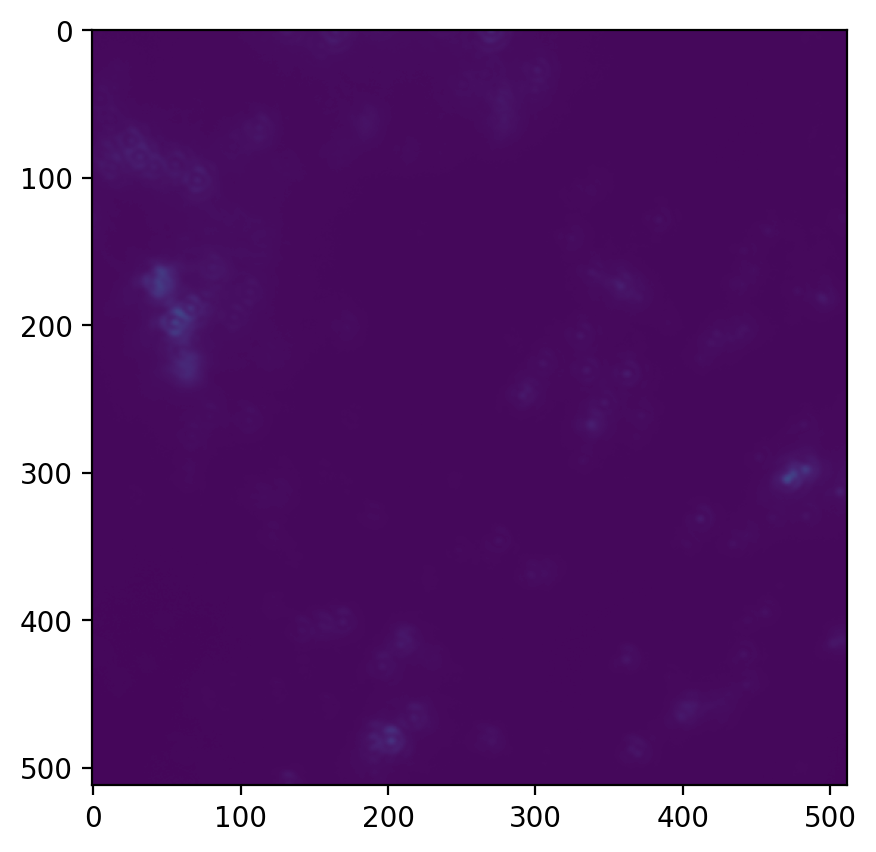

In [5]:
#and plot it
plt.figure(figsize=(5,5),dpi=200)
pylab.imshow(img[0],clim=(200,100000))

# Stage Object

In [6]:
#Initiate a stage object
from Stage import Stage
stg=Stage()

# AutoFocus on Microspheres

In [ ]:
#AF funtion, initiate stg object first
from AutoFocusMicroSpheres import AutoFocusMicroSpheres
af = AutoFocusMicroSpheres(exposure=1, CCDMode='Normal')

Zs=np.linspace(3.45,3.46,10)

autofocusZ=af.Autofocus(Zs, stg, showthem=True)
stg.MoveToZ(autofocusZ)

In [7]:
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  0 0 3.35


In [8]:
#Move in X and into focus
#time.sleep(5)
stg.MoveToY(-0.75)
#stg.MoveToZ(3.529)

#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  0 -0.75 3.35


In [9]:
FocalPoints=[]
FocalPoints.append([0,0,3.4656])
FocalPoints.append([1,1,3.4800])
FocalPoints.append([1,0,3.4707])
FocalPoints.append([0,1,3.4754])
FocalPoints=np.array(FocalPoints)

stg.DefineFocalPlane(FocalPoints)

In [21]:
def DefineFocalPlane(FocalPoints):
    FocalPlane=interp2d(FocalPoints[:,0],FocalPoints[:,1],FocalPoints[:,2])
    
def FocusAt(x,y):
    stg.MoveToX(x)
    stg.MoveToY(y)
    stg.MoveToZ(FocalPlane(x,y)[0])
    

def BigImageSweep(xmin,xmax,xstep,ymin,ymax,ystep):
    xs= np.arange(xmin,xmax,xstep)
    ys= np.arange(ymin,ymax,ystep)
    fig=plt.figure(figsize=(8,8),dpi=150)
    gs = fig.add_gridspec(len(xs), len(ys), hspace=0, wspace=0)
    axes= gs.subplots(sharex='col', sharey='row')
    pics={}
    for ix in range(0,len(xs)):
        for iy in range(0,len(ys)):
            x=xs[ix]
            y=ys[iy]
            stg.FocusAt(x,y)
            time.sleep(0.5)
            pics[x,y]=cam.Snap(1)[0]
            axes[ix][iy].imshow(pics[x,y])
            #plt.figure(figsize=(4,4),dpi=100)
            #plt.imshow(pics[x,y])
    return pics

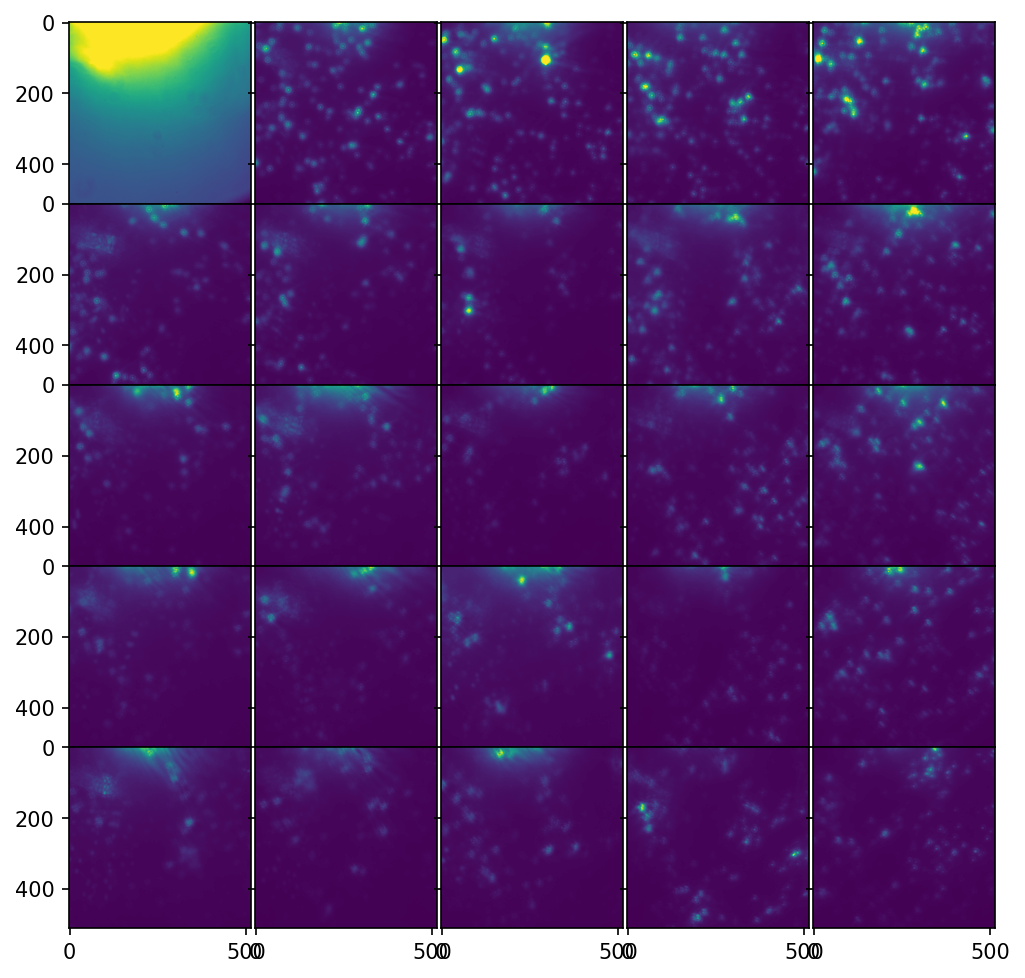

In [22]:
pics=BigImageSweep(0,0.1,0.02,0,0.1,0.02)

C:\Users\jonesb\Anaconda3\envs\camera\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


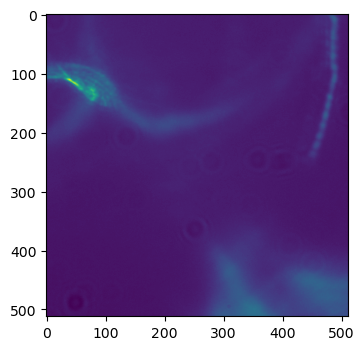

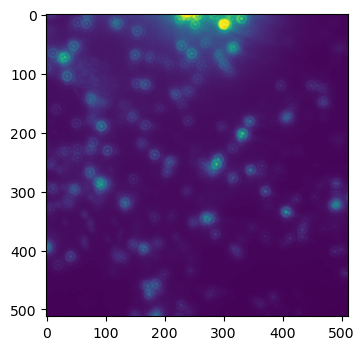

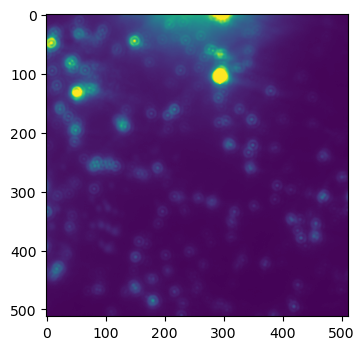

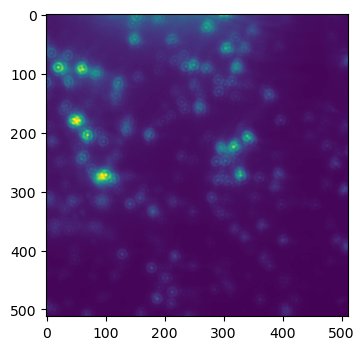

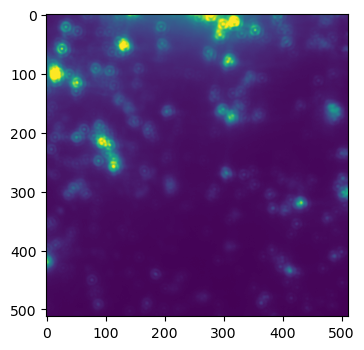

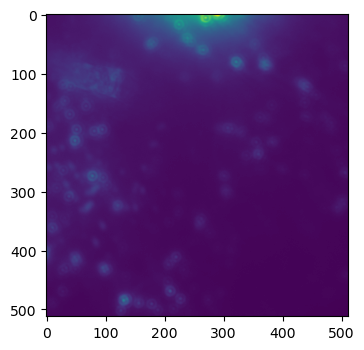

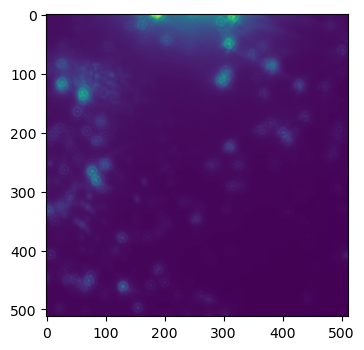

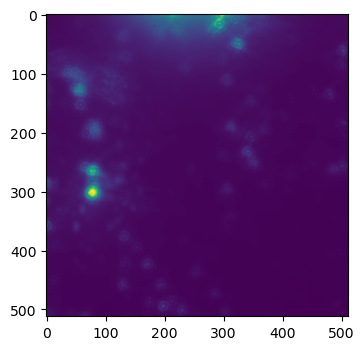

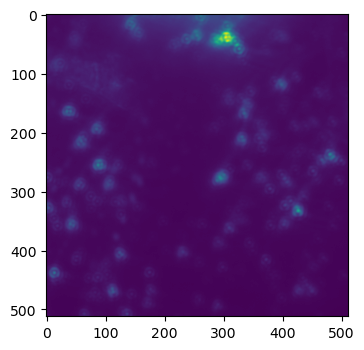

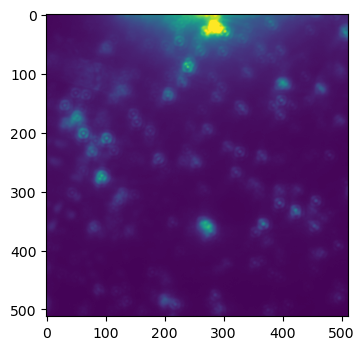

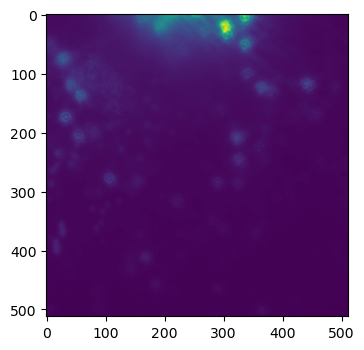

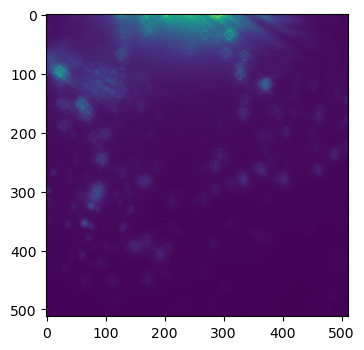

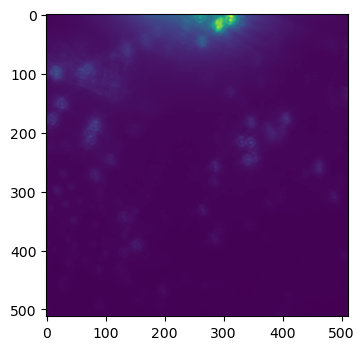

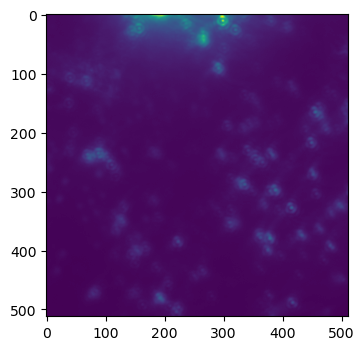

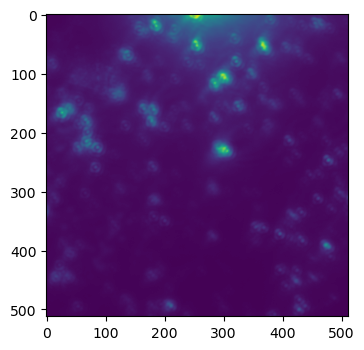

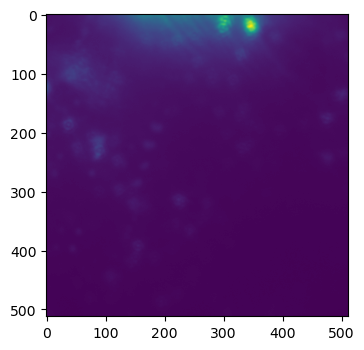

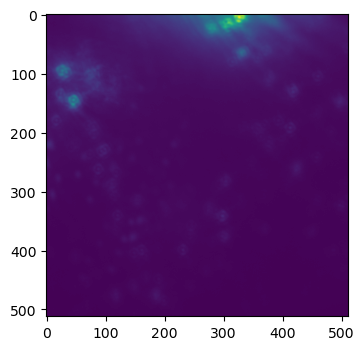

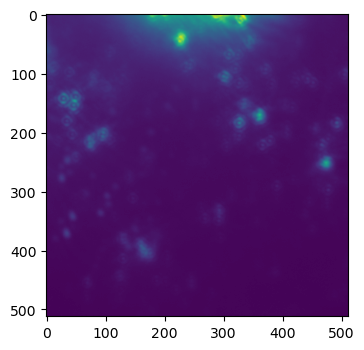

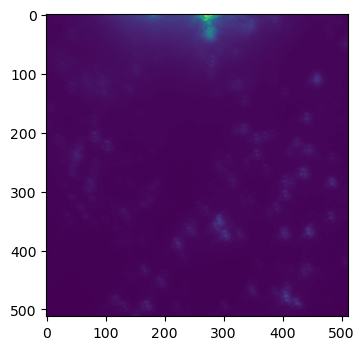

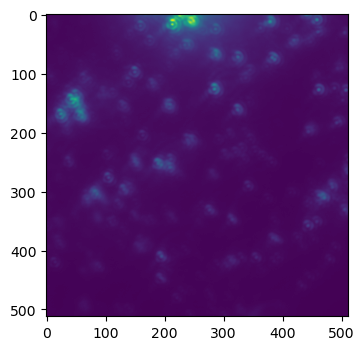

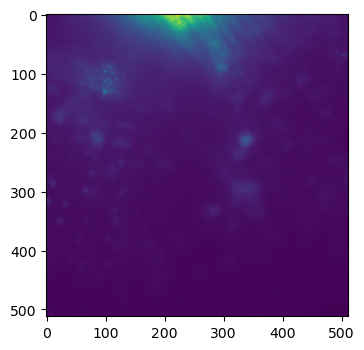

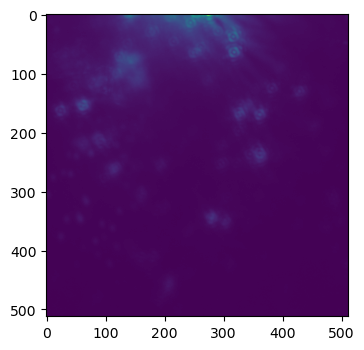

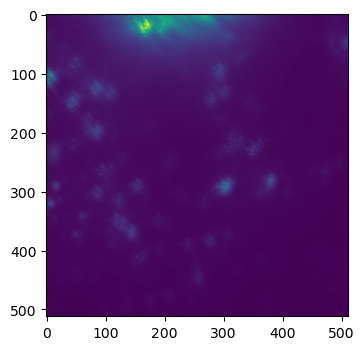

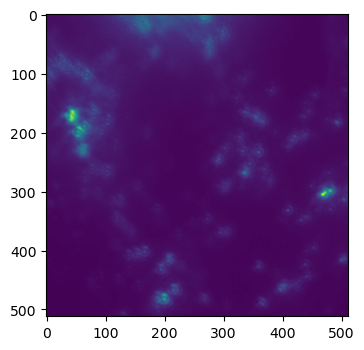

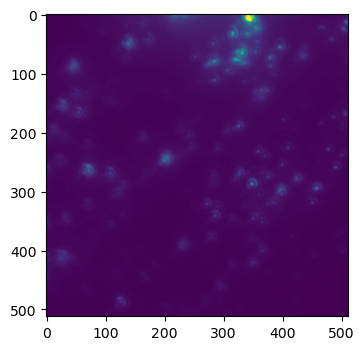

In [12]:
for k in pics.keys():
    plt.figure(figsize=(4,4),dpi=100)
    plt.imshow(pics[k])

In [13]:
pics

{(0.0,
  0.0): array([[3078., 3008., 3034., ..., 2952., 2888., 2848.],
        [3160., 3117., 2976., ..., 3050., 3000., 2840.],
        [3182., 3168., 3072., ..., 2890., 2922., 2889.],
        ...,
        [2599., 2657., 2665., ..., 4612., 4608., 4485.],
        [2662., 2667., 2634., ..., 4512., 4564., 4450.],
        [2618., 2659., 2660., ..., 4644., 4461., 4559.]]),
 (0.0,
  0.02): array([[ 8904.,  9815., 10812., ...,  3466.,  3638.,  3452.],
        [ 8736.,  9596., 10456., ...,  3496.,  3437.,  3280.],
        [ 8474.,  9207.,  9884., ...,  3297.,  3356.,  3158.],
        ...,
        [ 2705.,  2640.,  2616., ...,  2215.,  2190.,  2191.],
        [ 2550.,  2648.,  2676., ...,  2285.,  2220.,  2186.],
        [ 2615.,  2570.,  2629., ...,  2204.,  2212.,  2169.]]),
 (0.0,
  0.04): array([[5328., 5388., 5380., ..., 4145., 4158., 4036.],
        [5506., 5548., 5554., ..., 4091., 3953., 3757.],
        [5540., 5492., 5483., ..., 3784., 3912., 3808.],
        ...,
        [3419., 3310.,

In [14]:
#time.sleep(1)
stg.MoveToX(0)
stg.MoveToY(1)
stg.MoveToZ(3.4754)


#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  0 1 3.4754


# Scan Example

In [15]:
def MakeImageSweep(Zs,showthem=True):
    
    # Put the images in this array
    pics=[]
    
    for i in range(0,len(Zs)):
        
        # Move stage
        stg.MoveToZ(Zs[i])
        
        #Snap a pic
        #pics.append(cam.Snap(1)[0])
        print(Zs[i])
        time.sleep(1)

    return pics

In [16]:
Zs=np.linspace(3.4,3.5,100)
pics=MakeImageSweep(Zs,showthem=True)

3.4
3.401010101010101
3.4020202020202017
3.403030303030303
3.404040404040404
3.405050505050505
3.406060606060606
3.407070707070707
3.408080808080808
3.409090909090909
3.41010101010101
3.411111111111111
3.412121212121212
3.4131313131313132
3.414141414141414
3.415151515151515
3.416161616161616
3.4171717171717173
3.418181818181818
3.419191919191919
3.4202020202020202
3.421212121212121
3.422222222222222
3.423232323232323
3.4242424242424243
3.425252525252525
3.426262626262626
3.4272727272727272
3.4282828282828284
3.429292929292929
3.43030303030303
3.4313131313131313
3.4323232323232324
3.433333333333333
3.4343434343434343
3.4353535353535354
3.4363636363636365
3.437373737373737
3.4383838383838383
3.4393939393939394
3.44040404040404
3.4414141414141413
3.4424242424242424
3.4434343434343435
3.444444444444444
3.4454545454545453
3.4464646464646465
3.4474747474747476
3.4484848484848483
3.4494949494949494
3.4505050505050505
3.4515151515151516
3.4525252525252523
3.4535353535353535
3.4545454545454546


In [17]:
for i in range(0,len(pics)):
    #Optionally display them
    plt.figure(figsize=(5,5))
    plt.imshow(pics[i])
    plt.title(Zs[i])
    plt.clim(2000,5000)

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

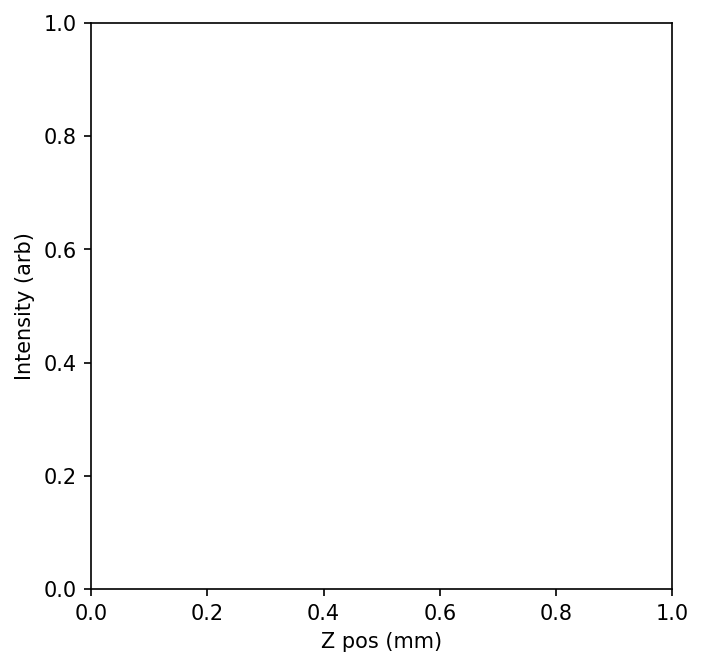

In [18]:
Integrals=[sum(sum(p)) for p in pics]
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("Z pos (mm)")
plt.ylabel("Intensity (arb)")
plt.plot(Zs,Integrals)